In [33]:
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
import csv

In [34]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os

import string
import numpy as np


In [35]:
from sklearn.naive_bayes import MultinomialNB

MyModelNB= MultinomialNB()
## When you look up this model, you learn that it wants the 
## !!! DF separate from the labels  !!!

# MyModelNB.fit(TrainDF_nolabels, TrainLabels)
# Prediction = MyModelNB.predict(TestDF)

# ## confusion matrix
# from sklearn.metrics import confusion_matrix
# cnf_matrix = confusion_matrix(TestLabels, Prediction)
# print("\nThe confusion matrix is:")
# print(cnf_matrix)
# print(np.round(MyModelNB.predict_proba(TestDF),2))


In [36]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS

# Function to read text files from a folder and assign labels
def read_files_and_assign_labels(folder, label):
    file_list = []
    label_list = []
    
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
                file_list.append(content)
                label_list.append(label)
    
    return pd.DataFrame({'Review': file_list, 'Label': label_list})

# Path to the folders
neg_folder = "/Users/gozi/Desktop/text mining/Homework 7/neg"
pos_folder = "/Users/gozi/Desktop/text mining/Homework 7/pos"

# Read and label negative reviews
neg_df = read_files_and_assign_labels(neg_folder, label='neg')

# Read and label positive reviews
pos_df = read_files_and_assign_labels(pos_folder, label='pos')

# Concatenate the DataFrames
combined_df = pd.concat([neg_df, pos_df], ignore_index=True)

In [125]:
neg_df

,Review,Label
0,Working with one of the best Shakespeare sourc...,neg
1,"Well...tremors I, the original started off in ...",neg
2,Ouch! This one was a bit painful to sit throug...,neg
3,"I've seen some crappy movies in my life, but t...",neg
4,"""Carriers"" follows the exploits of two guys an...",neg
...,...,...
12495,"My comments may be a bit of a spoiler, for wha...",neg
12496,"The ""saucy"" misadventures of four au pairs who...",neg
12497,"Oh, those Italians! Assuming that movies about...",neg
12498,Eight academy nominations? It's beyond belief....,neg


In [124]:
combined_df.to_csv("combineddf.csv", index=False)
combined_df

,Review,Label
0,Working with one of the best Shakespeare sourc...,neg
1,"Well...tremors I, the original started off in ...",neg
2,Ouch! This one was a bit painful to sit throug...,neg
3,"I've seen some crappy movies in my life, but t...",neg
4,"""Carriers"" follows the exploits of two guys an...",neg
...,...,...
24995,About a year ago I finally gave up on American...,pos
24996,When I saw the elaborate DVD box for this and ...,pos
24997,"Last November, I had a chance to see this film...",pos
24998,Great movie -I loved it. Great editing and use...,pos


In [105]:
combined_df = combined_df.apply(lambda col: col.str.replace('<br />', '') if col.dtype == 'O' else col)


In [106]:

filename = "combineddf.csv"  

reviews = []
sentimentlist = []

with open(filename, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    next(csv_reader)

    
    for row in csv_reader:
        review, sentiment = row[0], row[1]
        reviews.append(review)
        sentimentlist.append(sentiment)


print("Reviews:", reviews)
print("sentiment",sentimentlist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [107]:
vectorizer=CountVectorizer(input='content',
                        stop_words='english',
                        max_features=100)


X = vectorizer.fit_transform(reviews)
ColNames = vectorizer.get_feature_names_out()
df_vector=pd.DataFrame(X.toarray(), columns=ColNames)


In [108]:
df_vector.head()

,10,acting,action,actors,actually,away,bad,best,better,big,...,ve,want,watch,watching,way,woman,work,world,years,young
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
3,1,0,0,0,0,0,0,2,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
ColNames

array(['10', 'acting', 'action', 'actors', 'actually', 'away', 'bad',
       'best', 'better', 'big', 'bit', 'br', 'cast', 'character',
       'characters', 'come', 'comedy', 'day', 'did', 'didn', 'director',
       'does', 'doesn', 'don', 'end', 'fact', 'family', 'far', 'feel',
       'film', 'films', 'funny', 'gets', 'girl', 'going', 'good', 'got',
       'great', 'guy', 'horror', 'interesting', 'isn', 'just', 'kind',
       'know', 'life', 'like', 'little', 'll', 'long', 'look', 'lot',
       'love', 'make', 'makes', 'making', 'man', 'minutes', 'movie',
       'movies', 'music', 'new', 'old', 'original', 'people',
       'performance', 'plot', 'point', 'pretty', 'probably', 'quite',
       'real', 'really', 'right', 'role', 'saw', 'say', 'scene', 'scenes',
       'script', 'seen', 'series', 'story', 'thing', 'things', 'think',
       'thought', 'time', 'times', 'tv', 've', 'want', 'watch',
       'watching', 'way', 'woman', 'work', 'world', 'years', 'young'],
      dtype=object)

In [110]:
print(vectorizer.vocabulary_)


{'best': 7, 'film': 29, 'br': 11, 'cast': 12, 'good': 35, 'original': 63, 'movie': 58, 'quite': 70, 'watch': 92, 'make': 53, 'movies': 59, 'going': 34, 'right': 73, 'bad': 6, 'fact': 25, 'little': 47, 'girl': 33, 'tv': 89, 'did': 18, 'really': 72, 'think': 85, 'people': 64, 'better': 8, 'things': 84, 'bit': 10, 'does': 21, 'way': 94, 'know': 44, 'actors': 3, 'script': 79, 'director': 20, 'characters': 14, 'work': 96, 'didn': 19, 'away': 5, 've': 90, 'seen': 80, 'life': 45, 'isn': 41, 'minutes': 57, 'end': 24, 'big': 9, 'scene': 77, 'just': 42, 'times': 88, 'new': 61, '10': 0, 'action': 2, 'like': 46, 'makes': 54, 'performance': 65, 'role': 74, 'character': 13, 'point': 67, 'guy': 38, 'look': 50, 'don': 23, 'long': 49, 'time': 87, 'thing': 83, 'horror': 39, 'real': 71, 'world': 97, 'story': 82, 'kind': 43, 'watching': 93, 'man': 56, 'got': 36, 'lot': 51, 'far': 27, 'plot': 66, 'acting': 1, 'music': 60, 'actually': 4, 'll': 48, 'thought': 86, 'young': 99, 'pretty': 68, 'saw': 75, 'feel':

In [111]:
def Logical_Numbers_Present(anyString):
    return any(char.isdigit() for char in anyString)
##----------------------------------------------------

for nextcol in df_vector.columns:
    #print(nextcol)
    ## Remove unwanted columns
    #Result=str.isdigit(nextcol) ## Fast way to check numbers
    #print(Result)
    
    ##-------------call the function -------
    LogResult=Logical_Numbers_Present(nextcol)
    ## The above returns a logical of True or False
    
    ## The following will remove all columns that contains numbers
    if(LogResult==True):
        #print(LogResult)
        #print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)

    ## The following will remove any column with name
    ## of 3 or smaller - like "it" or "of" or "pre".
    ##print(len(nextcol))  ## check it first
    ## NOTE: You can also use this code to CONTROL
    ## the words in the columns. For example - you can
    ## have only words between lengths 5 and 9. 
    ## In this case, we remove columns with words <= 3.
    elif(len(str(nextcol))<=2):
        print(nextcol)
        df_vector=df_vector.drop([nextcol], axis=1)
    
    
print(df_vector)

br
ll
tv
ve
       acting  action  actors  actually  away  bad  best  better  big  bit  \
0           0       0       0         0     0    0     1       0    0    0   
1           0       0       0         0     0    2     0       1    0    0   
2           0       0       1         0     1    0     0       0    0    1   
3           0       0       0         0     0    0     2       0    1    0   
4           0       1       0         0     1    0     0       0    0    0   
...       ...     ...     ...       ...   ...  ...   ...     ...  ...  ...   
24995       0       0       0         0     0    0     2       0    0    0   
24996       0       0       0         0     0    0     0       0    1    0   
24997       1       0       0         0     0    0     0       0    0    0   
24998       1       0       0         0     0    0     0       0    0    0   
24999       0       0       0         0     0    0     0       0    0    0   

       ...  times  want  watch  watching  way  woma

In [112]:
df_vector.head()

,acting,action,actors,actually,away,bad,best,better,big,bit,...,times,want,watch,watching,way,woman,work,world,years,young
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,2,0,1,0,0,0
3,0,0,0,0,0,0,2,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:

df_sentiment = df_vector

In [114]:
df_sentiment = df_sentiment.drop(columns='LABEL', errors='ignore')

df_sentiment.insert(loc=0, column='LABEL', value=sentimentlist)


In [115]:
df_sentiment.head()

,LABEL,acting,action,actors,actually,away,bad,best,better,big,...,times,want,watch,watching,way,woman,work,world,years,young
0,neg,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,neg,0,0,0,0,0,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,neg,0,0,1,0,1,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
3,neg,0,0,0,0,0,0,2,0,1,...,1,0,0,0,0,0,0,0,0,0
4,neg,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model for testing sentiment dataset

In [116]:
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(df_sentiment, test_size=0.3)
print(TrainDF1)
print(TestDF1)

      LABEL  acting  action  actors  actually  away  bad  best  better  big  \
17901   pos       0       0       0         0     0    0     0       0    2   
9510    neg       0       0       0         0     0    0     1       0    1   
24475   pos       1       0       0         0     1    0     0       0    0   
15457   pos       0       0       0         0     0    0     0       0    0   
22755   pos       0       0       1         2     0    0     0       1    0   
...     ...     ...     ...     ...       ...   ...  ...   ...     ...  ...   
7897    neg       1       0       0         0     0    2     0       0    0   
162     neg       0       0       0         0     1    1     0       0    1   
24023   pos       0       0       0         0     0    0     0       0    0   
23394   pos       0       0       0         0     0    0     0       0    1   
7769    neg       0       0       0         0     0    1     1       0    0   

       ...  times  want  watch  watching  way  woma

In [117]:
Test2Labels=TestDF1["LABEL"]
print(Test2Labels)

TestDF1 = TestDF1.drop(["LABEL"], axis=1) #remove the entire column

23151    pos
18386    pos
2128     neg
6971     neg
3287     neg
        ... 
13176    pos
7054     neg
14013    pos
23640    pos
20018    pos
Name: LABEL, Length: 7500, dtype: object


In [118]:
Train2Labels=TrainDF1["LABEL"]
print(Train2Labels)

TrainDF1 = TrainDF1.drop(["LABEL"], axis=1)
print(TrainDF1)

17901    pos
9510     neg
24475    pos
15457    pos
22755    pos
        ... 
7897     neg
162      neg
24023    pos
23394    pos
7769     neg
Name: LABEL, Length: 17500, dtype: object
       acting  action  actors  actually  away  bad  best  better  big  bit  \
17901       0       0       0         0     0    0     0       0    2    0   
9510        0       0       0         0     0    0     1       0    1    0   
24475       1       0       0         0     1    0     0       0    0    0   
15457       0       0       0         0     0    0     0       0    0    1   
22755       0       0       1         2     0    0     0       1    0    0   
...       ...     ...     ...       ...   ...  ...   ...     ...  ...  ...   
7897        1       0       0         0     0    2     0       0    0    0   
162         0       0       0         0     1    1     0       0    1    0   
24023       0       0       0         0     0    0     0       0    0    0   
23394       0       0       0      

In [119]:
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB1= MultinomialNB()

 

## Run on all three Dfs.................
NB2=MyModelNB1.fit(TrainDF1, Train2Labels)
Prediction2 = MyModelNB1.predict(TestDF1)
print(Prediction2)
print(np.round(MyModelNB1.predict_proba(TestDF1),2))

MyModelNB1.get_params(deep=True)


['pos' 'neg' 'pos' ... 'pos' 'pos' 'pos']
[[0.48 0.52]
 [0.67 0.33]
 [0.43 0.57]
 ...
 [0.15 0.85]
 [0.04 0.96]
 [0.42 0.58]]


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [120]:

from sklearn.metrics import accuracy_score


print(accuracy_score(Test2Labels, Prediction2))

0.7121333333333333


In [121]:
from sklearn.metrics import confusion_matrix
cnf_matrix1 = confusion_matrix(Test2Labels, Prediction2)
print("\nThe confusion matrix \nfor the 100 word model is:")
print(cnf_matrix1)


The confusion matrix 
for the 100 word model is:
[[2674 1051]
 [1108 2667]]


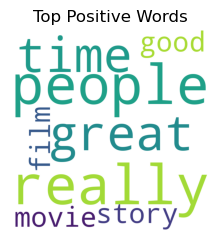

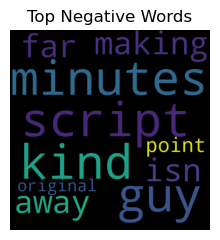

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

def generate_word_cloud(words, title, color='white'):
    wordcloud = WordCloud(width=800, height=800, background_color=color, min_font_size=10).generate(words)

    # Plot the WordCloud image
    plt.figure(figsize=(2, 2), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)

    plt.show()

def plot_coefficients_word_cloud(MODEL=MyModelNB1, COLNAMES=TrainDF1.columns, top_features=10):
    # Model if SVM MUST be SVC, RE: SVM_Model=LinearSVC(C=10)
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef, axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef, axis=0)[:top_features]

    # Extract top words based on coefficients
    positive_words = " ".join(COLNAMES[top_positive_coefficients])
    negative_words = " ".join(COLNAMES[top_negative_coefficients])

    # Generate word clouds for positive and negative coefficients
    generate_word_cloud(positive_words, title="Top Positive Words", color='white')
    generate_word_cloud(negative_words, title="Top Negative Words", color='black')

# Assuming you have a model (SVM_Model) and column names (TrainDF1.columns)
plot_coefficients_word_cloud()

